# Visualization for report

### First, load the image

100%|██████████| 30/30 [00:15<00:00,  1.89it/s]

Total DBZ maps processed: 30. Shape of each DBZ map: (505, 1220)
----------------------------------------


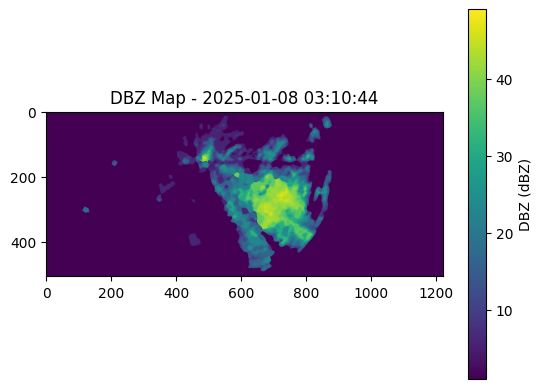

In [9]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

from src.utils import windy_preprocessing_pipeline, process_image

SOURCE_PATH = "data/images/philippines"
img_paths = [os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.png')][:30]

dbz_maps: list[tuple[np.ndarray, datetime]] = []

for img_path in tqdm(img_paths):
    img, time_frame = process_image(img_path)
    dbz_map = windy_preprocessing_pipeline(img)
    dbz_maps.append((dbz_map, time_frame))

print(f"Total DBZ maps processed: {len(dbz_maps)}. Shape of each DBZ map: {dbz_maps[0][0].shape}")
print("-"*40)

# Visualize first DBZ map
plt.imshow(dbz_maps[0][0], cmap='viridis')
plt.colorbar(label='DBZ (dBZ)')
plt.title(f"DBZ Map - {dbz_maps[0][1]}")
plt.show()

 57%|█████▋    | 17/30 [00:03<00:02,  6.33it/s]

Error converting contour [[829 246]] to polygon: A linearring requires at least 4 coordinates.


 97%|█████████▋| 29/30 [00:05<00:00,  3.49it/s]

Error converting contour [[775 230]] to polygon: A linearring requires at least 4 coordinates.


100%|██████████| 30/30 [00:05<00:00,  5.07it/s]

Error converting contour [[773 230]] to polygon: A linearring requires at least 4 coordinates.
----------------------------------------


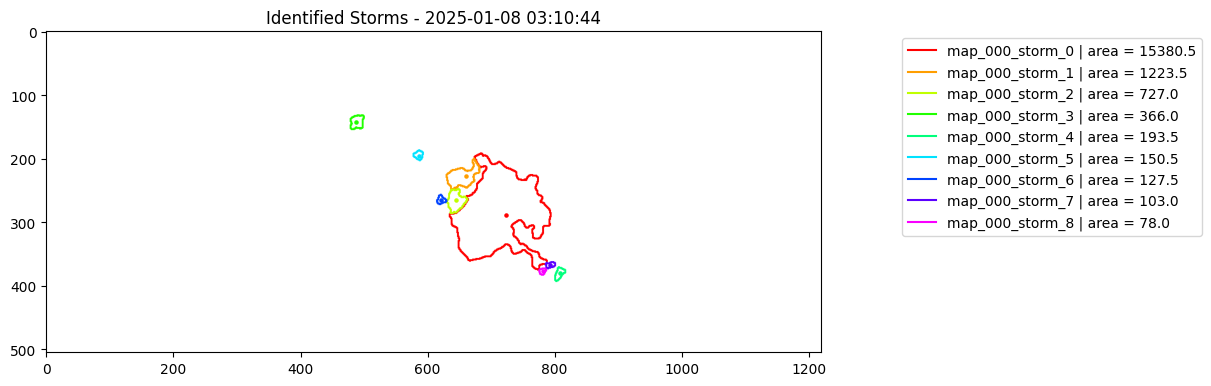

In [10]:
import cv2

from src.cores.base import StormsMap
from src.model.etitan_original import ETitanPrecipitationModel
from src.identification import MorphContourIdentifier, SimpleContourIdentifier
from src.utils import convert_polygons_to_contours

DBZ_THRESHOLD = 35  # dBZ
FILTER_AREA = 50  # pixels      ==> Less than 50 pixels will be filtered out

### Select identifier
simple_identifier = SimpleContourIdentifier()
identifier = MorphContourIdentifier(n_thresh=3, center_filter=10, kernel_size=5)

model = ETitanPrecipitationModel(identifier=identifier)

storms_maps: list[StormsMap] = []

for idx, (dbz_map, time_frame) in tqdm(list(enumerate(dbz_maps))):
    storms_map = model.identify_storms(dbz_map, time_frame, map_id=f"map_{idx:03d}", threshold=DBZ_THRESHOLD, filter_area=FILTER_AREA)
    storms_maps.append(storms_map)

print("-"*40)

# Visualize storms with contours on the first DBZ map
storms_map = storms_maps[0]
plt.figure(figsize=(10, 8))

img_shape = dbz_maps[0][0].shape
img_shape = (img_shape[0], img_shape[1], 3)
blank_image = np.ones(img_shape, dtype=np.uint8) * 255

# colors = spectral_colors(len(storms_map.storms))

for storm in storms_map.storms:
    y_centroid, x_centroid = storm.centroid
    color = storm.contour_color
    
    plt.plot([], [], color=np.array(color)/255.0, label=f"{storm.id} | area = {storm.contour.area:.1f}")
    plt.scatter(x_centroid, y_centroid, color=np.array(color)/255.0, s=5)
    cv2.drawContours(blank_image, convert_polygons_to_contours([storm.contour]), -1, color, thickness=2)  # Draw contour in red

plt.imshow(blank_image, cmap='grey')
plt.title(f"Identified Storms - {storms_map.time_frame}")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.show()

In [11]:
model_2 = ETitanPrecipitationModel(identifier=simple_identifier)
storms_map_2: list[StormsMap] = []

for idx, (dbz_map, time_frame) in tqdm(list(enumerate(dbz_maps))):
    storms_map = model_2.identify_storms(dbz_map, time_frame, map_id=f"map_{idx:03d}", threshold=DBZ_THRESHOLD, filter_area=FILTER_AREA)
    storms_map_2.append(storms_map)

100%|██████████| 30/30 [00:00<00:00, 82.45it/s]


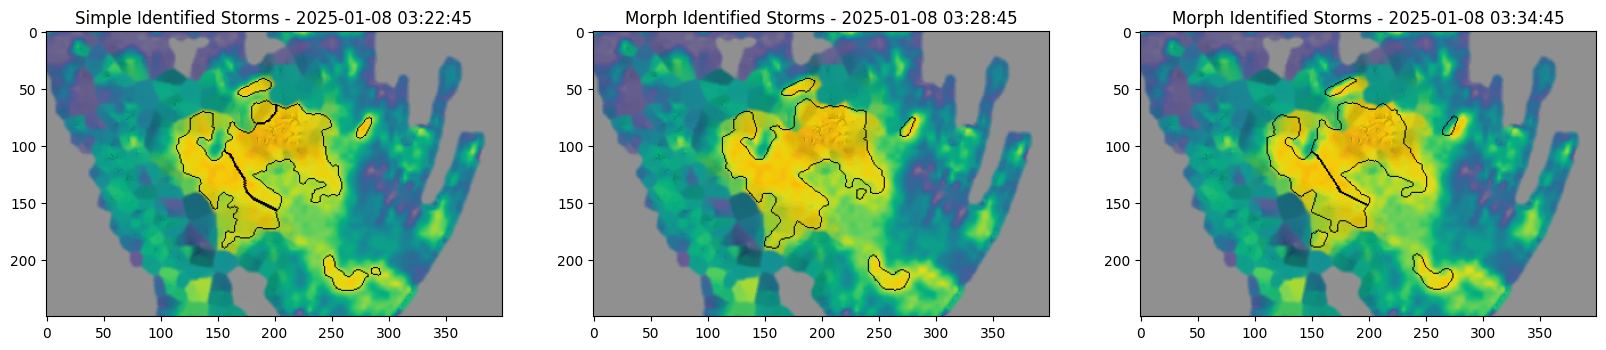

In [26]:
from src.utils.background_preprocessing import _preprocess

IDX = 2
img_map, _ = process_image(img_paths[IDX])
img_map = _preprocess(img_map)
# img_map = np.ones(img_shape, dtype=np.uint8) * 255


plt.figure(figsize=(20, 8))

img_shape = dbz_maps[0][0].shape
img_shape = (img_shape[0], img_shape[1], 3)

# Draw for Simple Identifier
plt.subplot(1, 3, 1)
storms_map = storms_maps[IDX]
blank_image_1 = img_map.copy()
for storm in storms_map.storms:
    y_centroid, x_centroid = storm.centroid
    color = storm.contour_color
    color = (0, 0, 0)
    
    plt.plot([], [], color=np.array(color)/255.0, label=f"{storm.id} | area = {storm.contour.area:.1f}")
    plt.scatter(x_centroid, y_centroid, color=np.array(color)/255.0, s=5)
    cv2.drawContours(blank_image_1, convert_polygons_to_contours([storm.contour]), -1, color, thickness=1)  # Draw contour in red

plt.imshow(blank_image_1[150:400, 500:900], cmap='grey')
plt.title(f"Simple Identified Storms - {storms_map.time_frame}")

plt.subplot(1, 3, 2)
storms_map = storms_maps[IDX+1]
blank_image_2 = img_map.copy()
for storm in storms_map.storms:
    y_centroid, x_centroid = storm.centroid
    color = storm.contour_color
    color = (0, 0, 0)
    
    plt.plot([], [], color=np.array(color)/255.0, label=f"{storm.id} | area = {storm.contour.area:.1f}")
    plt.scatter(x_centroid, y_centroid, color=np.array(color)/255.0, s=5)
    cv2.drawContours(blank_image_2, convert_polygons_to_contours([storm.contour]), -1, color, thickness=1)
plt.imshow(blank_image_2[150:400, 500:900], cmap='grey')
plt.title(f"Morph Identified Storms - {storms_map.time_frame}")


plt.subplot(1, 3, 3)
storms_map = storms_maps[IDX+2]
blank_image_2 = img_map.copy()
for storm in storms_map.storms:
    y_centroid, x_centroid = storm.centroid
    color = storm.contour_color
    color = (0, 0, 0)
    
    plt.plot([], [], color=np.array(color)/255.0, label=f"{storm.id} | area = {storm.contour.area:.1f}")
    plt.scatter(x_centroid, y_centroid, color=np.array(color)/255.0, s=5)
    cv2.drawContours(blank_image_2, convert_polygons_to_contours([storm.contour]), -1, color, thickness=1)
plt.imshow(blank_image_2[150:400, 500:900], cmap='grey')
plt.title(f"Morph Identified Storms - {storms_map.time_frame}")
plt.show()